IMPORTING THE REQUIRED LIBRARIES

In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import keras

LOADING AND SPLITTING THE DATA

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
print('Training images: {}'.format(x_train.shape))
print('Testing images: {}'.format(x_test.shape))

Training images: (50000, 32, 32, 3)
Testing images: (10000, 32, 32, 3)


In [5]:
print(x_train[0].shape)

(32, 32, 3)


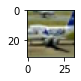

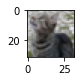

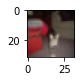

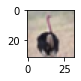

In [6]:
for i in range(332,336):
  plt.subplot(120+1+i)
  img = x_train[i]
  plt.imshow(img)
  plt.show()

In [7]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


PROCESSING THE DATA

In [8]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /=255
x_test /=255
n_classes = 10

print("Shape before one-hot encoding: ",y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ",y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


BUILDING THE MODEL

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
#Convlutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Hidden Layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

#Output Layer
model.add(Dense(10,activation='softmax'))

#Compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#Training the Model
model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))





Epoch 1/5
391/391 [==============================] - 597s 2s/step - loss: 1.5197 - accuracy: 0.4427 - val_loss: 1.1254 - val_accuracy: 0.5967
Epoch 2/5
391/391 [==============================] - 507s 1s/step - loss: 1.0944 - accuracy: 0.6140 - val_loss: 0.9496 - val_accuracy: 0.6745
Epoch 3/5
391/391 [==============================] - 458s 1s/step - loss: 0.9303 - accuracy: 0.6736 - val_loss: 0.8708 - val_accuracy: 0.6981
Epoch 4/5
391/391 [==============================] - 487s 1s/step - loss: 0.8084 - accuracy: 0.7162 - val_loss: 0.8403 - val_accuracy: 0.7119
Epoch 5/5
391/391 [==============================] - 520s 1s/step - loss: 0.7163 - accuracy: 0.7480 - val_loss: 0.8223 - val_accuracy: 0.7167


PREDICTING

In [12]:
classes = range(0,10)

names = ['accuracy',
         'automobile',
         'bird'
         'cat'
         'deer'
         'dog'
         'frog'
         'horse'
         'ship'
         'truck']
        
class_labels = dict(zip(classes, names))

batch = x_test[100:109]
labels = np.argmax(y_test[100:109],axis=-1)

#make predictions
prediction = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 156ms/step


In [13]:
print(prediction)

[[2.7858079e-03 2.9461089e-04 4.5957208e-02 3.3817749e-02 5.3288209e-01
  9.1763183e-02 1.3084262e-02 2.7650976e-01 9.7520975e-04 1.9300951e-03]
 [1.7870868e-04 2.1668124e-05 3.4402385e-02 1.5827309e-01 1.7279327e-01
  4.1223317e-01 2.6303820e-02 1.9547962e-01 1.0406433e-04 2.1010288e-04]
 [1.2383070e-04 1.5542532e-04 6.6347639e-03 3.2155760e-02 2.0314392e-03
  6.4583272e-02 8.8953727e-01 3.6052600e-03 9.0651662e-04 2.6641856e-04]
 [4.1120959e-04 3.3234523e-04 3.2196019e-02 5.9277326e-01 5.6321926e-02
  6.5554835e-02 2.3443893e-01 1.5046068e-02 9.0974534e-04 2.0155816e-03]
 [8.1456135e-05 9.8387170e-01 2.0765171e-08 8.8738396e-08 2.8984461e-08
  3.0594181e-09 1.8741735e-09 9.1850495e-08 1.4363357e-02 1.6832148e-03]
 [8.7604058e-05 9.5569432e-01 1.0600905e-05 4.6097048e-05 4.8271704e-07
  1.8273790e-06 2.9696923e-06 7.0816938e-08 4.2987030e-02 1.1690320e-03]
 [2.7459797e-03 7.6419814e-04 1.8555142e-02 3.7576467e-01 1.0418728e-02
  2.1392103e-01 3.5247833e-01 1.3484185e-03 2.3578187e-02 

In [14]:
for image in prediction:
  print(np.sum(image))

1.0
0.99999994
0.99999994
0.99999994
1.0
1.0000001
1.0
1.0
0.99999994


In [15]:
class_result = np.argmax(prediction, axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


FINAL OBJECT DETECTION

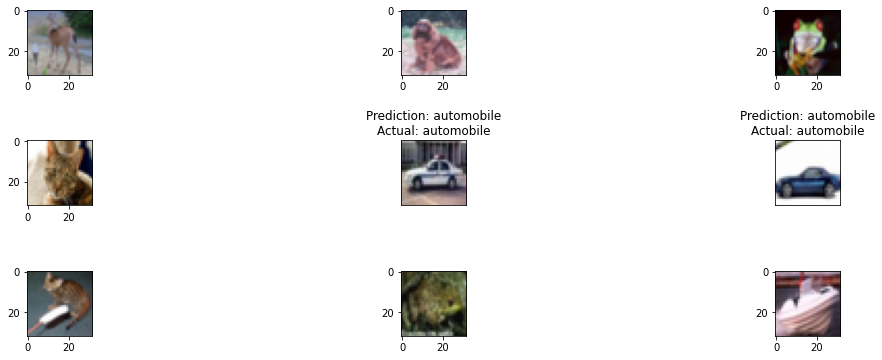

In [17]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace=1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  #plot the image
  axs[i].imshow(img)

#show the plot
plt.show()